# **Cats Vs Dogs classification using CNN – Deep Learning Project**

**Project description**

*This project revolves around the implementation of a Convolutional Neural Network (CNN) for image classification, specifically distinguishing between images of cats and dogs. The CNN algorithm processes input images, assigning weights and biases to different aspects of each image, enabling it to discern distinct features. Training the neural network involves using batches of labeled images, where the network's predictions are compared to the actual labels.*

**Project Goal**

*The primary objective of this project is to develop a robust image classification system capable of identifying whether an input image contains a cat or a dog. The CNN model is trained on a dataset containing images of both cats and dogs, with the aim of learning distinctive features that differentiate the two. The training process involves adjusting the model's parameters to minimize the difference between its predictions and the actual labels across batches of images. Once the training is complete, the model can be applied to new, unseen images, making accurate predictions about whether the input image features a cat or a dog. The flexibility of the implemented model allows for potential deployment on websites or various mobile devices based on specific requirements. The Dogs vs Cats dataset, available on Kaggle, serves as the foundational dataset for this image classification project.*

In [4]:
# Install the Kaggle API Client using pip

pip install -q kaggle

In [5]:
# Upload files to Google Colab environment using the 'files' module

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedshuhaib","key":"6d797687ae548bb662a2eb9b027d1693"}'}

In [6]:
# Create a Kaggle Directory

! mkdir ~/.kaggle

In [7]:
# Copy the Kaggle API Key file (Kaggle.json)

! cp kaggle.json ~/.kaggle/

In [8]:
# Set the appropriate permissions for the Kaggle API Key file to enhance security
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Download the dataset from Kaggle 

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:52<00:00, 23.4MB/s]
100% 1.06G/1.06G [00:53<00:00, 21.6MB/s]


In [ ]:
# Unzip the dataset

!unzip /content/dogs-vs-cats.zip

In [53]:
# Import necessary libraries for data manipulation, visualization and deep learning
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import cv2 as cv

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,BatchNormalization,Dropout

In [12]:
# Data generators for training and testing using the keras image_dataset_from_directory function

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',            # Path to the training dataset directory
    labels='inferred',                                  # Inferring labels from the directory structure
    label_mode='int',                                   # Using integer labels
    batch_size=32,                                      # Batch size for training
    image_size=(256,256)                                # Resizing images to (256, 256) pixels
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [13]:
# Preprocessing function to normalize pixel values and apply data type conversion

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

# Apply the preprocessing function to the training dataset
train_ds = train_ds.map(process)

# Apply the preprocessing function to the testing dataset
test_ds = test_ds.map(process)

### **Model Architecture**

In [14]:
# Define a Sequential model for image classification

model = Sequential()

# Convolutional layers with Batch Normalization and MaxPooling

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers with dropout for regularization
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

# Output layer with sigmoid activation for binary classification
model.add(Dense(1,activation='sigmoid'))


In [15]:
# Display a summary of the defined neural network model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [17]:
# Compile the model with Adam optimizer, binary crossentropy loss, and accuracy as the evaluation metric

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
# Train the model on the training dataset and validate on the testing dataset, with 15 epochs

history = model.fit(train_ds, epochs=15, validation_data=test_ds)

Epoch 1/15
625/625 [==============================] - 81s 114ms/step - loss: 1.7465 - accuracy: 0.5532 - val_loss: 0.6927 - val_accuracy: 0.5622
Epoch 2/15
625/625 [==============================] - 68s 108ms/step - loss: 0.6729 - accuracy: 0.5892 - val_loss: 0.6263 - val_accuracy: 0.6356
Epoch 3/15
625/625 [==============================] - 70s 112ms/step - loss: 0.6099 - accuracy: 0.6668 - val_loss: 0.5788 - val_accuracy: 0.6942
Epoch 4/15
625/625 [==============================] - 70s 111ms/step - loss: 0.5522 - accuracy: 0.7121 - val_loss: 0.6524 - val_accuracy: 0.6790
Epoch 5/15
625/625 [==============================] - 70s 110ms/step - loss: 0.4884 - accuracy: 0.7587 - val_loss: 0.6485 - val_accuracy: 0.7246
Epoch 6/15
625/625 [==============================] - 70s 112ms/step - loss: 0.4202 - accuracy: 0.7944 - val_loss: 0.5172 - val_accuracy: 0.7510
Epoch 7/15
625/625 [==============================] - 67s 107ms/step - loss: 0.3725 - accuracy: 0.8217 - val_loss: 0.5367 - val_ac

### **Testing**

In [54]:
# Save the trained model using pickle

with open('Image_Classification_catdog.pkl', 'wb') as file:
  pickle.dump(model, file)


(437, 500, 3)
AxesImage(size=(437, 500))
(256, 256, 3)


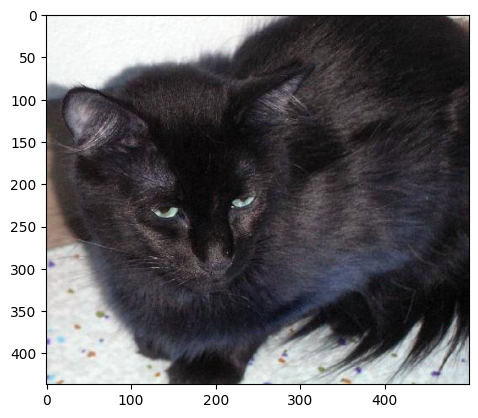

In [56]:
# Load and preprocess a test image for prediction

testimgpath = '/content/dogs_vs_cats/test/cats/cat.10074.jpg'
test_img = cv.imread(testimgpath)

print(test_img.shape)
print(plt.imshow(test_img))

test_img = cv.resize(test_img, (256, 256))
print(test_img.shape)

In [58]:
# Function to predict whether the input image contains a cat or a dog

def predictor(input_path):
  
  # Load the pre-trained model
  with open('Image_Classification_catdog.pkl', 'rb') as f:
    model = pickle.load(f)

  # Read and resize the input image
  test_img = cv.imread(input_path)
  test_img = cv.resize(test_img, (256, 256))

  # Reshape the image to match the model's input shape
  input_img = test_img.reshape(1, 256, 256, 3)
  
  # Make predictions using the loaded model
  result = model.predict(input_img)

  if result > 0.5:
    print("Dog")
  else:
    print("Cat")


In [59]:
predictor('/content/dogs_vs_cats/test/cats/cat.10074.jpg')

1/1 [==============================] - 0s 117ms/step
Cat


(375, 499, 3)
AxesImage(size=(375, 499))
(256, 256, 3)


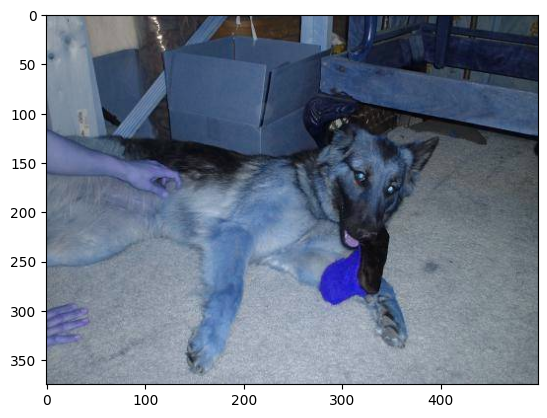

In [60]:
# Load and preprocess a test image for prediction

testimgpath = '/content/dogs_vs_cats/test/dogs/dog.10054.jpg'
test_img = cv.imread(testimgpath)

print(test_img.shape)
print(plt.imshow(test_img))

test_img = cv.resize(test_img, (256, 256))
print(test_img.shape)

In [61]:
predictor('/content/dogs_vs_cats/test/dogs/dog.10054.jpg')

1/1 [==============================] - 0s 122ms/step
Dog


*In conclusion, the trained Convolutional Neural Network (CNN) has demonstrated strong performance on the Dogs vs Cats dataset. After completing the training process with 15 epochs, the model achieved a remarkable accuracy of approximately 94.87% on the training set. This signifies that the model effectively learned the distinctive features of cats and dogs from the provided dataset.*

*it is essential to note that the model's performance on the validation set slightly dropped, resulting in an accuracy of approximately 82.90%. This divergence between training and validation accuracy could suggest potential overfitting, where the model may have become too specific to the training data and might not generalize well to unseen data.*

*In summary, the current model has demonstrated commendable performance on both the training and testing sets. With an impressive accuracy of approximately 94.87% on the training set and 82.90% on the testing set, it showcases its capability to effectively discern between images of cats and dogs. The slight deviation in accuracy between the training and testing sets is within an acceptable range, indicating that the model is successfully generalizing to new, unseen images.*